## G&F (2014) redo plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes
import seaborn as sns
%matplotlib inline
sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pickle

In [2]:
np.set_printoptions(precision=2,suppress=True)

In [3]:
with open('2014data_models_withconst.pkl','rb') as cellar:
    best_fitted_models = pickle.load(cellar)

In [4]:
best_fitted_models[0].params

const       2.401046
Mg         -1.262779
K/Vac+Na    6.314323
dtype: float64

In [5]:
with open('2014data_models_noconst.pkl','rb') as cellar:
    best_fitted_models_noc = pickle.load(cellar)

In [6]:
best_fitted_models[0].predict()

array([ 0.82, -0.12, -0.49,  0.15, -0.22, -0.59, -1.16, -0.94, -0.72,
       -0.18, -0.87, -0.57, -1.12, -0.64, -1.62, -0.65, -0.34, -0.01,
       -1.21, -1.2 , -0.43, -0.74, -0.57,  0.  , -0.42, -0.51, -0.27,
       -0.49, -0.38,  0.07, -0.2 , -0.21, -0.27, -0.18,  0.48, -0.27,
       -0.32,  0.26,  0.11])

In [7]:
filename = "./AmphiboleProcessedRegressionData.csv"
amph_chem = pd.read_csv(filename)
amph_chem.columns

Index(['Mg', 'FeM', 'K/Vac+Na', 'Di/Hi M', 'Fe2+', 'Fe3+', 'Mg# F'ous',
       'ln(fH2O)', 'Si', 'Ti', 'AlM', 'Mn', 'Ca', 'Na', 'Avac', 'K', 'T',
       'lnP', 'AlT/Si', 'Mg#M', 'Mg#', 'Ca/FeB', 'K+Vac/Na', 'ln K(Cl)'],
      dtype='object')

In [8]:
len(amph_chem['ln K(Cl)'])

39

In [9]:
len(best_fitted_models[0].predict())

39

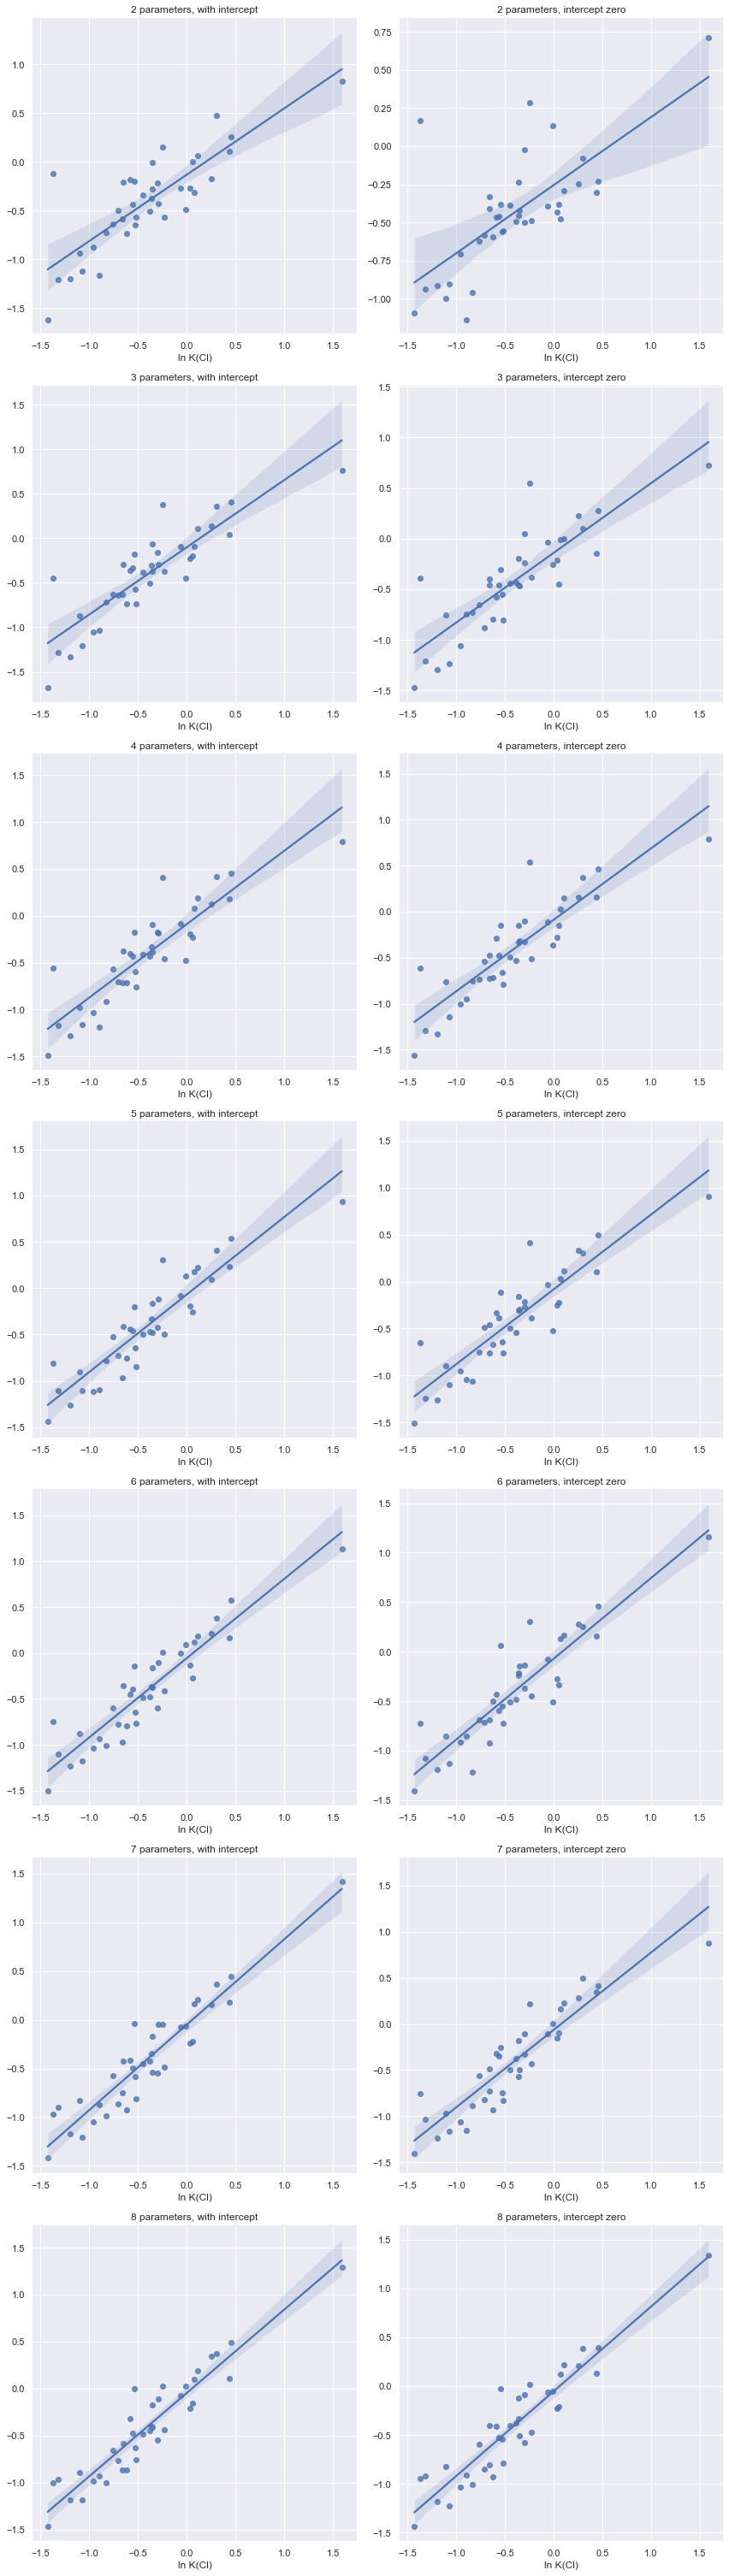

In [19]:
f,axes = plt.subplots(7, 2, figsize=(12,42))
sns.despine(left=True)
for i, model in enumerate(best_fitted_models):
    sns.regplot(x=amph_chem['ln K(Cl)'],y=model.predict(),ax=axes[i,0])
    axes[i,0].set_title(str(i+2)+' parameters, with intercept')
for i, model in enumerate(best_fitted_models_noc):
    sns.regplot(x=amph_chem['ln K(Cl)'],y=model.predict(),ax=axes[i,1])
    axes[i,1].set_title(str(i+2)+' parameters, intercept zero')
plt.tight_layout()